# Loading Basic libraries


In [289]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [290]:
from matplotlib.collections import PathCollection
from statsmodels.graphics.gofplots import qqplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix
from yellowbrick.style import set_palette
from yellowbrick.model_selection import LearningCurve, FeatureImportances
from yellowbrick.contrib.wrapper import wrap
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi']=100
set_palette('dark')

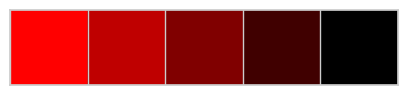

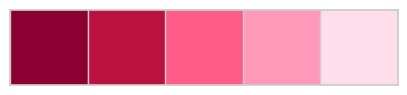

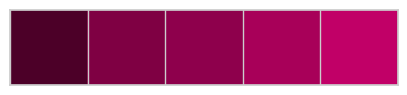

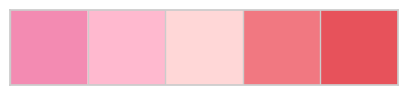

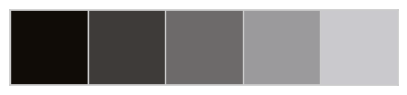

In [291]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [292]:
df = pd.read_csv("BreastCancer-dataset.csv")
outlierDF = df.copy(deep=True)
# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

In [293]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [294]:
# --- Descriptive Statistics ---
cols = set(df.columns) - {'id', 'Unnamed: 32'}
df1 = df[list(cols)]
df1.select_dtypes(exclude=['object']).describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

# Malignant vs Benign

*************************
.: Cancer Type Total :.
*************************


B    357
M    212
Name: diagnosis, dtype: int64

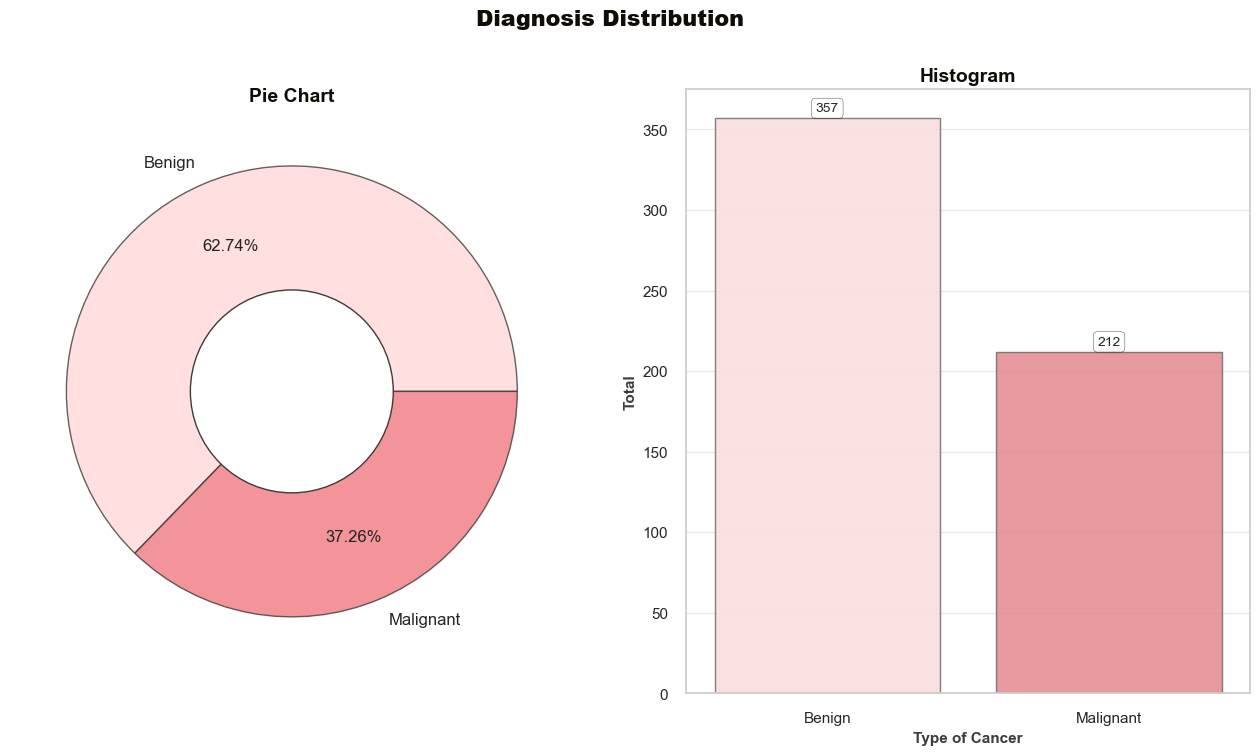

In [295]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Benign', 'Malignant']
order=df['diagnosis'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Diagnosis Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['diagnosis'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='diagnosis', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Type of Cancer', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Values ---
print('*' * 25)
print('\033[1m'+'.: Cancer Type Total :.'+'\033[0m')
print('*' * 25)
df.diagnosis.value_counts(dropna=False)

## Checking for missing values

In [296]:
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [297]:

# attributes = ['radius_mean',
# 'texture_mean',
# 'perimeter_mean',
# 'area_mean',
# 'smoothness_mean',
# 'compactness_mean',
# 'concavity_mean',
# 'concave points_mean',
# 'symmetry_mean',
# 'fractal_dimension_mean',
# 'radius_se',
# 'texture_se',
# 'perimeter_se',
# 'area_se',
# 'smoothness_se',
# 'compactness_se',
# 'concavity_se',
# 'concave points_se',
# 'symmetry_se',
# 'fractal_dimension_se',
# 'radius_worst',
# 'texture_worst',
# 'perimeter_worst',
# 'area_worst',
# 'smoothness_worst',
# 'compactness_worst',
# 'concavity_worst',
# 'concave points_worst',
# 'symmetry_worst',
# 'fractal_dimension_worst']
# for attribute in attributes:
#     data_benign = df[df["diagnosis"] == "B"]
#     data_malignant = df[df["diagnosis"] == "M"]
#     desc = data_benign.radius_mean.describe()
#     Q1 = desc[4]
#     Q3 = desc[6]
#     IQR = Q3-Q1
#     lower_bound = Q1 - 1.5*IQR
#     upper_bound = Q3 + 1.5*IQR
#     print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
#     data_benign[data_benign.attribute < lower_bound].col
#     print("Outliers: ",data_benign[(data_benign.attribute < lower_bound) | (data_benign.attribute > upper_bound)].attributes.values)

In [298]:
outlierDF.describe()
y = df.diagnosis

df.drop(['Unnamed: 32', 'id', 'diagnosis'], axis = 1, inplace=True)



df.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

In [299]:
outlierDF.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [300]:
df.isnull().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [301]:
x = df

In [302]:
x.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

## Visualization

We need to perfrom standardization since differences between values of features are too high to be observed on the plot, now we are going to plot features in three groups (MEAN, SE, WORST: 10 Columns for each of the attributes)

I am going to do some swarm plot analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_mean'),
  Text(1, 0, 'texture_mean'),
  Text(2, 0, 'perimeter_mean'),
  Text(3, 0, 'area_mean'),
  Text(4, 0, 'smoothness_mean'),
  Text(5, 0, 'compactness_mean'),
  Text(6, 0, 'concavity_mean'),
  Text(7, 0, 'concave points_mean'),
  Text(8, 0, 'symmetry_mean'),
  Text(9, 0, 'fractal_dimension_mean')])

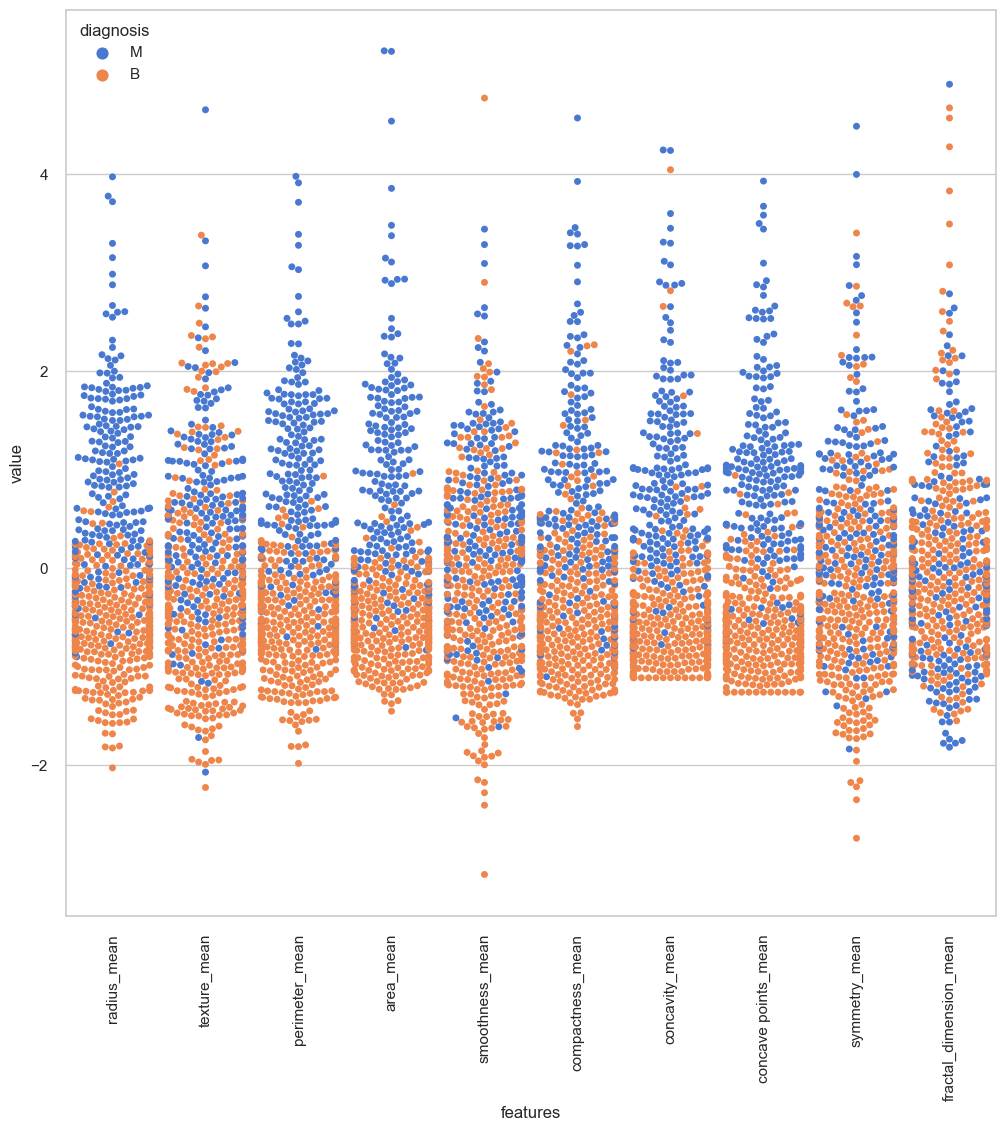

In [303]:
sns.set(style = "whitegrid", palette = "muted")
data_dia = y
data = x
data_n_2 = (data- data.mean())/(data.std()) #Standardization Regular Process

data = pd.concat([y, data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
                       var_name = "features",
                       value_name= 'value')
plt.figure(figsize=(12,12))
sns.swarmplot(x='features', y='value', hue = 'diagnosis', data = data)
plt.xticks(rotation=90)

Here we observe that fractac_dimension_mean, symmetry_mean, smoothness_mean are very jumbled up together indicating they are not ideal for classification between malignant and benign. Also we can observe that concativty_point_mean and concavity_mean are separated mostly, not totally, indicating they can have higher weightage in the classification

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_se'),
  Text(1, 0, 'texture_se'),
  Text(2, 0, 'perimeter_se'),
  Text(3, 0, 'area_se'),
  Text(4, 0, 'smoothness_se'),
  Text(5, 0, 'compactness_se'),
  Text(6, 0, 'concavity_se'),
  Text(7, 0, 'concave points_se'),
  Text(8, 0, 'symmetry_se'),
  Text(9, 0, 'fractal_dimension_se')])

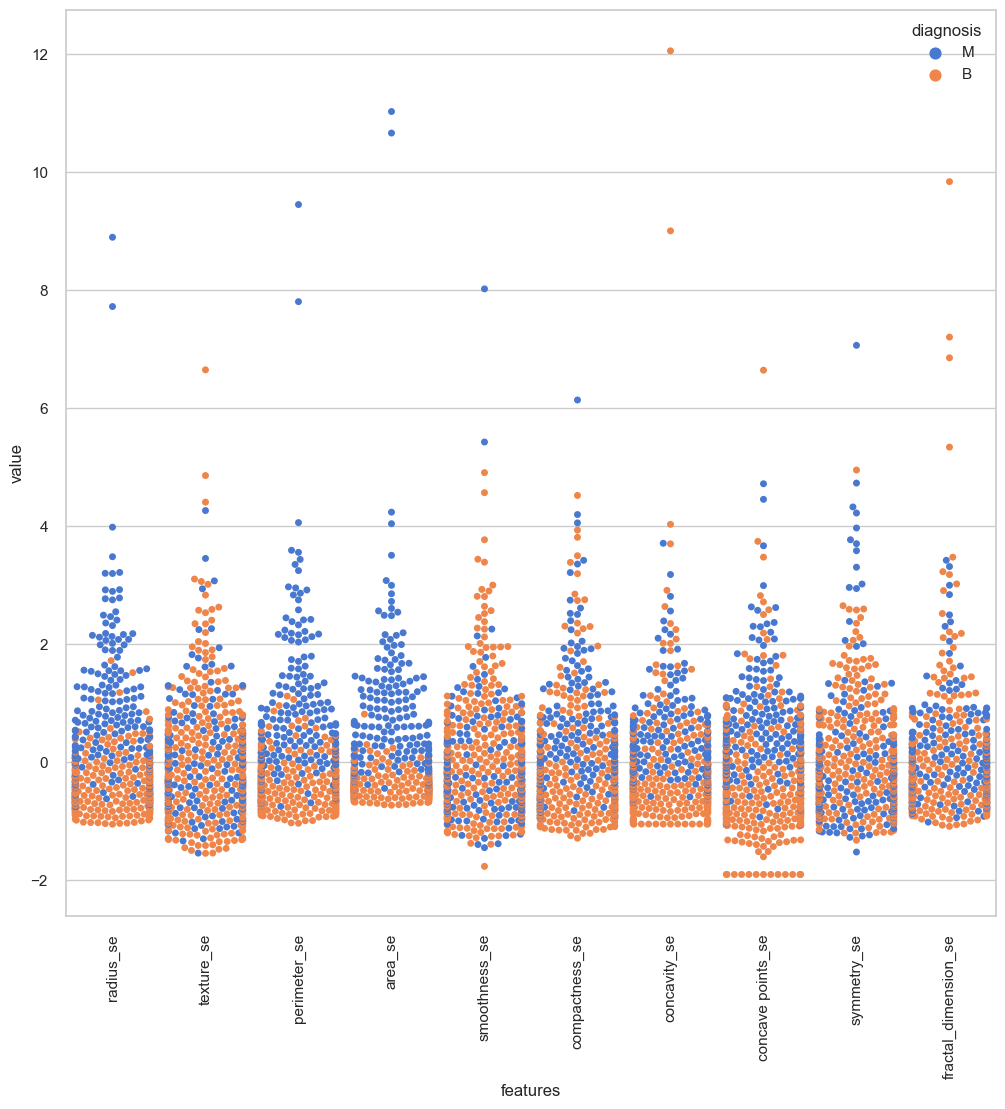

In [304]:

data = pd.concat([y, data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
                       var_name = "features",
                       value_name= 'value')
plt.figure(figsize=(12,12))
sns.swarmplot(x='features', y='value', hue = 'diagnosis', data = data)
plt.xticks(rotation=90)

Here variance can be seen more clearly. symmetry_se, smoothness_se, texture_se are again mixed highly, making it hard to classify while using these features

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'radius_worst'),
  Text(1, 0, 'texture_worst'),
  Text(2, 0, 'perimeter_worst'),
  Text(3, 0, 'area_worst'),
  Text(4, 0, 'smoothness_worst'),
  Text(5, 0, 'compactness_worst'),
  Text(6, 0, 'concavity_worst'),
  Text(7, 0, 'concave points_worst'),
  Text(8, 0, 'symmetry_worst'),
  Text(9, 0, 'fractal_dimension_worst')])

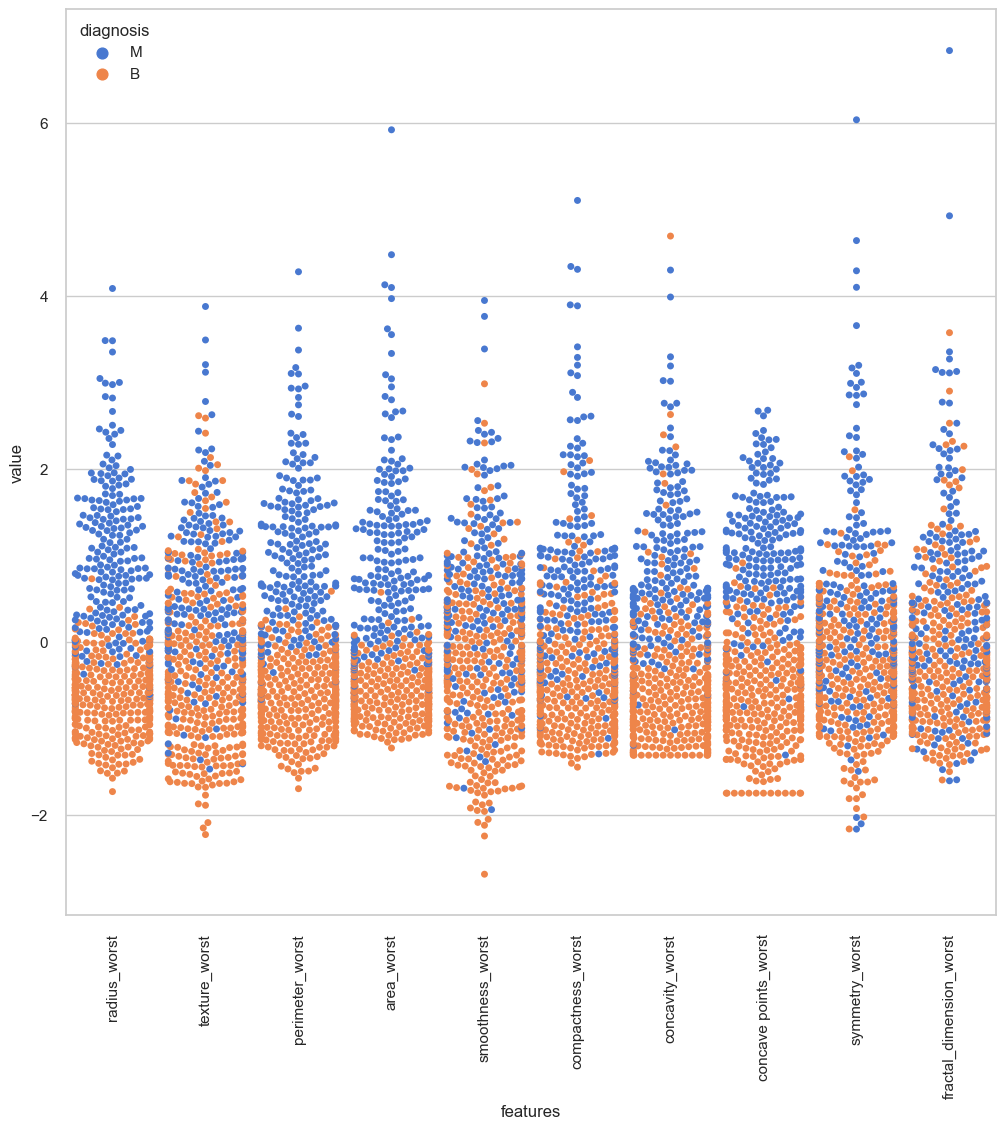

In [305]:

data = pd.concat([y, data_n_2.iloc[:,20:30]],axis=1)
data = pd.melt(data, id_vars = 'diagnosis',
                       var_name = "features",
                       value_name= 'value')
plt.figure(figsize=(12,12))
sns.swarmplot(x='features', y='value', hue = 'diagnosis', data = data)
plt.xticks(rotation=90)

area_worst looks like benign and malignant are separated mostly, again not completely. Also radius_worst indicates the same.

Now we are going to observe the correlation between features. Using regular heatmap.

## Multi-Collinearity Correlation Matrix 

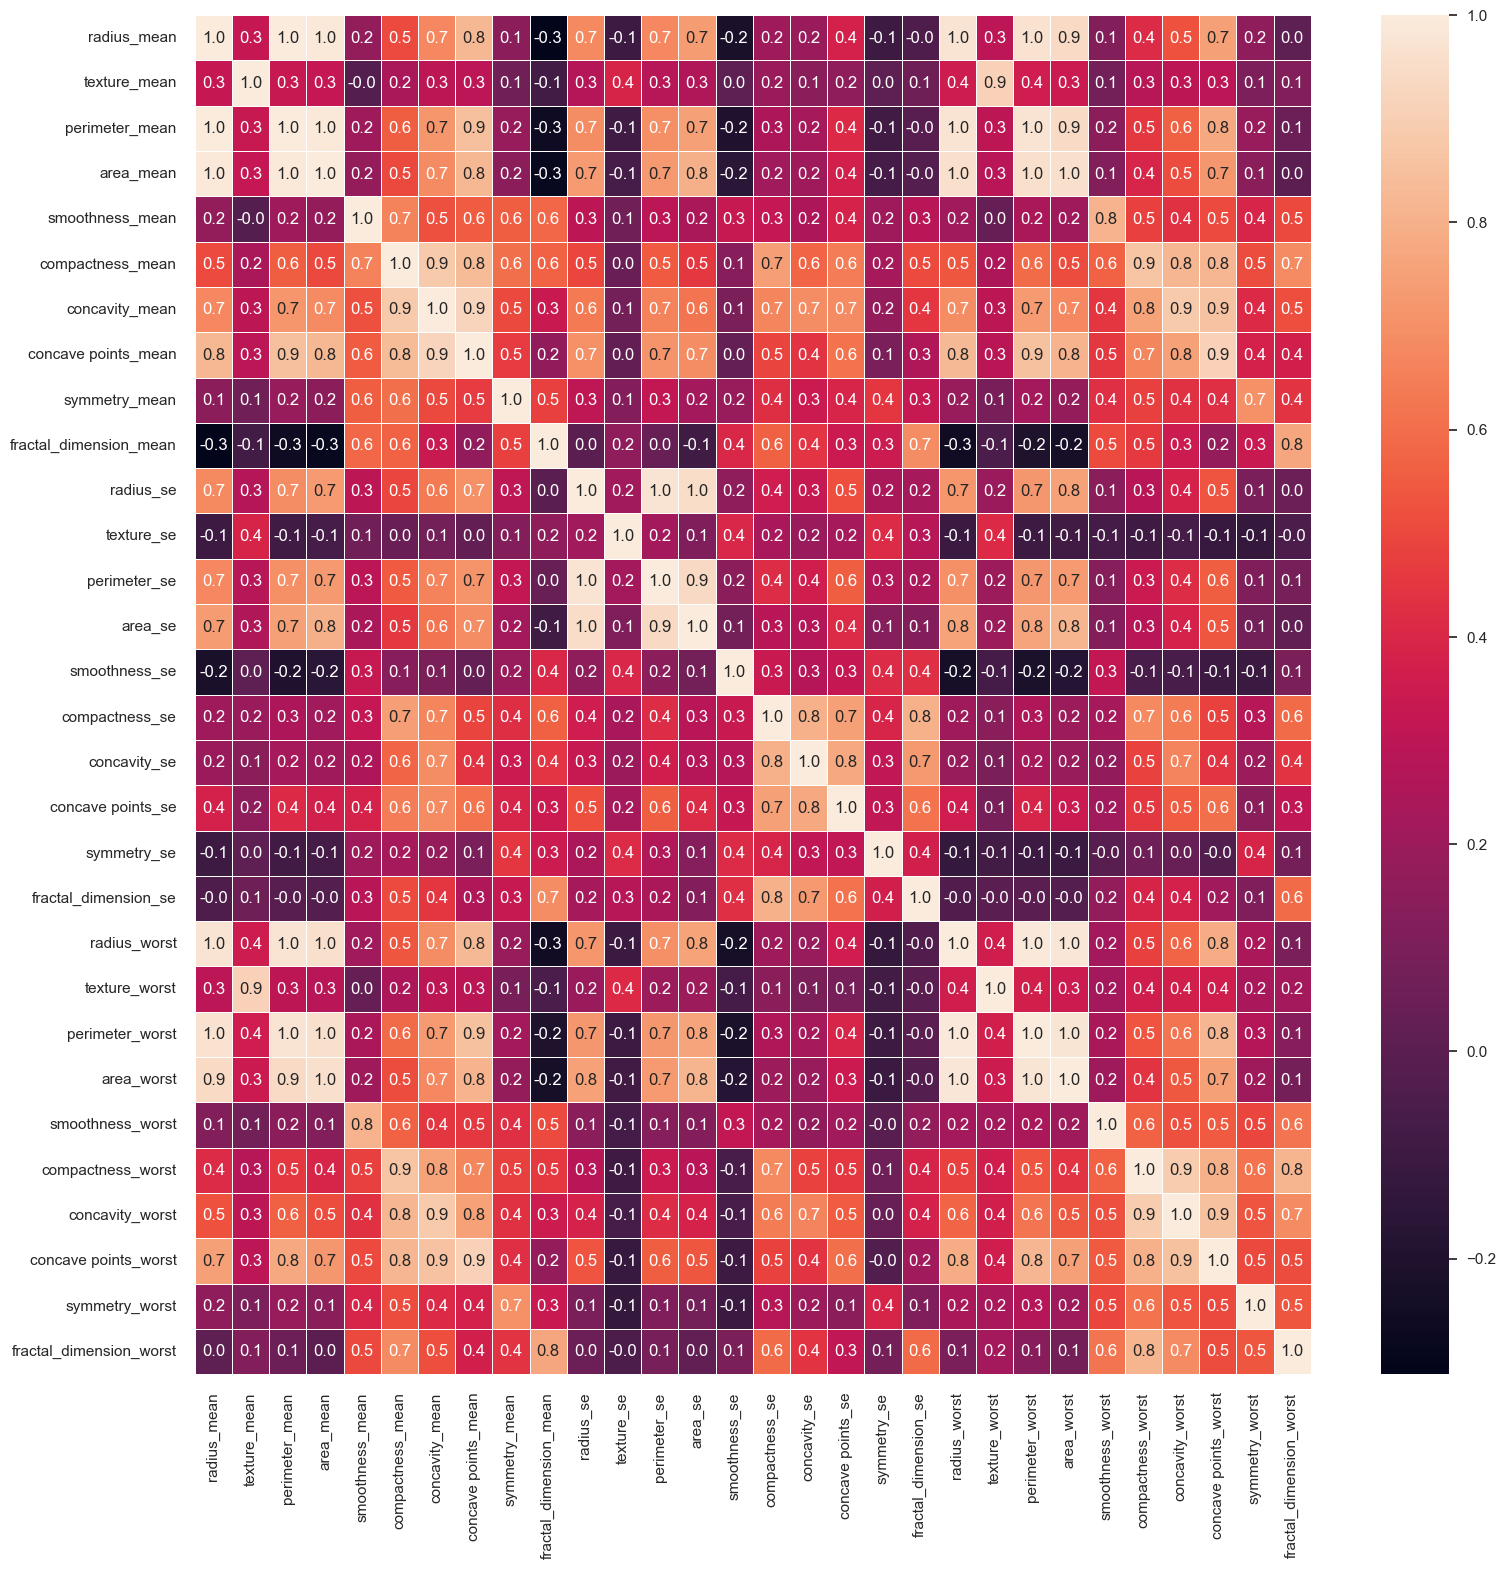

In [306]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
heat_table = x.corr()

In [307]:
heat_table

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.323782        0.997855   0.987357   
texture_mean                0.323782      1.000000        0.329533   0.321086   
perimeter_mean              0.997855      0.329533        1.000000   0.986507   
area_mean                   0.987357      0.321086        0.986507   1.000000   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                0.969539      0.352573        0.969476   0.962746   
texture_worst               0.297008      0.912045        0.303038   0.287489   
perimeter_worst             0.965137      0.358040        0.970387   0.959120   
area_worst                  0.941082      0.343546        0.941550   0.959213   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                 1.000000          0.659123        0.521984   
compactness_mean                0.659123          1.000000        0.883121   
concavity_mean                  0.521984          0.883121        1.000000   
concave points_mean             0.553695          0.831135        0.921391   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

In [308]:
heat_table_removed_highly_corr = heat_table[heat_table.iloc[:,:]<0.9] 
heat_table_removed_highly_corr

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                      NaN      0.323782             NaN        NaN   
texture_mean                0.323782           NaN        0.329533   0.321086   
perimeter_mean                   NaN      0.329533             NaN        NaN   
area_mean                        NaN      0.321086             NaN        NaN   
smoothness_mean             0.170581     -0.023389        0.207278   0.177028   
compactness_mean            0.506124      0.236702        0.556936   0.498502   
concavity_mean              0.676764      0.302418        0.716136   0.685983   
concave points_mean         0.822529      0.293464        0.850977   0.823269   
symmetry_mean               0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean     -0.311631     -0.076437       -0.261477  -0.283110   
radius_se                   0.679090      0.275869        0.691765   0.732562   
texture_se                 -0.097317      0.386358       -0.086761  -0.066280   
perimeter_se                0.674172      0.281673        0.693135   0.726628   
area_se                     0.735864      0.259845        0.744983   0.800086   
smoothness_se              -0.222600      0.006614       -0.202694  -0.166777   
compactness_se              0.206000      0.191975        0.250744   0.212583   
concavity_se                0.194204      0.143293        0.228082   0.207660   
concave points_se           0.376169      0.163851        0.407217   0.372320   
symmetry_se                -0.104321      0.009127       -0.081629  -0.072497   
fractal_dimension_se       -0.042641      0.054458       -0.005523  -0.019887   
radius_worst                     NaN      0.352573             NaN        NaN   
texture_worst               0.297008           NaN        0.303038   0.287489   
perimeter_worst                  NaN      0.358040             NaN        NaN   
area_worst                       NaN      0.343546             NaN        NaN   
smoothness_worst            0.119616      0.077503        0.150549   0.123523   
compactness_worst           0.413463      0.277830        0.455774   0.390410   
concavity_worst             0.526911      0.301025        0.563879   0.512606   
concave points_worst        0.744214      0.295316        0.771241   0.722017   
symmetry_worst              0.163953      0.105008        0.189115   0.143570   
fractal_dimension_worst     0.007066      0.119205        0.051019   0.003738   

                         smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                     0.170581          0.506124        0.676764   
texture_mean                   -0.023389          0.236702        0.302418   
perimeter_mean                  0.207278          0.556936        0.716136   
area_mean                       0.177028          0.498502        0.685983   
smoothness_mean                      NaN          0.659123        0.521984   
compactness_mean                0.659123               NaN        0.883121   
concavity_mean                  0.521984          0.883121             NaN   
concave points_mean             0.553695          0.831135             NaN   
symmetry_mean                   0.557775          0.602641        0.500667   
fractal_dimension_mean          0.584792          0.565369        0.336783   
radius_se                       0.301467          0.497473        0.631925   
texture_se                      0.068406          0.046205        0.076218   
perimeter_se                    0.296092          0.548905        0.660391   
area_se                         0.246552          0.455653        0.617427   
smoothness_se                   0.332375          0.135299        0.098564   
compactness_se                  0.318943          0.738722        0.670279   
concavity_se                    0.248396          0.570517        0.691270   
concave points_se               0.380676          0.642262        0.683260   
symmetry_se                    

## Key Observations

Here we can observe that  radius_mean, perimeter_mean and area_mean are correlated with each other, we shall only use area_mean and drop the other 2.
area_mean is chosen because in swarm plot we had seen that it was highly separated as compared to the other 2. And using similar reasoning we shall continue removing other tables too.

There could have been another approach to fix the multicollinearity by combining the highly correlated variables together as an example:


df2 = df.copy()
df2['area_mean'] = df4.apply(lambda x: x['radius_mean'] + x['perimeter_mean'],axis=1)


X = df5.drop(['radius_mean', 'perimeter_mean'],axis=1)


vif_scores(X)

Removing such columns helps us to reduce redundancy in data since they convey more or less the same information.

Besides these, radius_se, perimeter_se and area_se are highly correlated, we only choose area_se. 
perimeter_worst, radius_worst and area_worst are again correlated, we are only choosing area_worst. Compactness_worst, concavity_worst and concave points_worst, here we only prefer concavity_worst.

texture_mean and texture_worst are correlated, we choose texture_mean. area_worst and area_mean are correlated, we use area_mean.
Compactness_mean, concavity_mean and concave points_mean are correlated with each other, using similar reasoning as before we choose concavity_mean.
concavity_mean and concavity_worst are highly correlated and we can drop either of these, but we choose concavity_mean to drop
Compactness_se, concavity_se and concave points_se so we use concavity_se. 


## Side Note

There could have been other combinations for manual feature selections as well, for instance, I could have chosen texture_worst instead of texture_mean in case of their highly correlation coefficient and the final prediction would have been varied ever so slightly. For manual feature selection the decision in some cases can be arbitrary where there is no clear decsion-making factor for choosing either, that is why strategical feature selection processes and algorithms are used, which will be covered in the following sections

In [309]:
dropped_columns = ['perimeter_mean','radius_mean','compactness_mean','concavity_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(dropped_columns,axis = 1 )        # we are not modifying x for later usage
x_1.head()

texture_mean  area_mean  smoothness_mean  symmetry_mean  \
0         10.38     1001.0          0.11840         0.2419   
1         17.77     1326.0          0.08474         0.1812   
2         21.25     1203.0          0.10960         0.2069   
3         20.38      386.1          0.14250         0.2597   
4         14.34     1297.0          0.10030         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

Plotting the correlation table again

<AxesSubplot:>

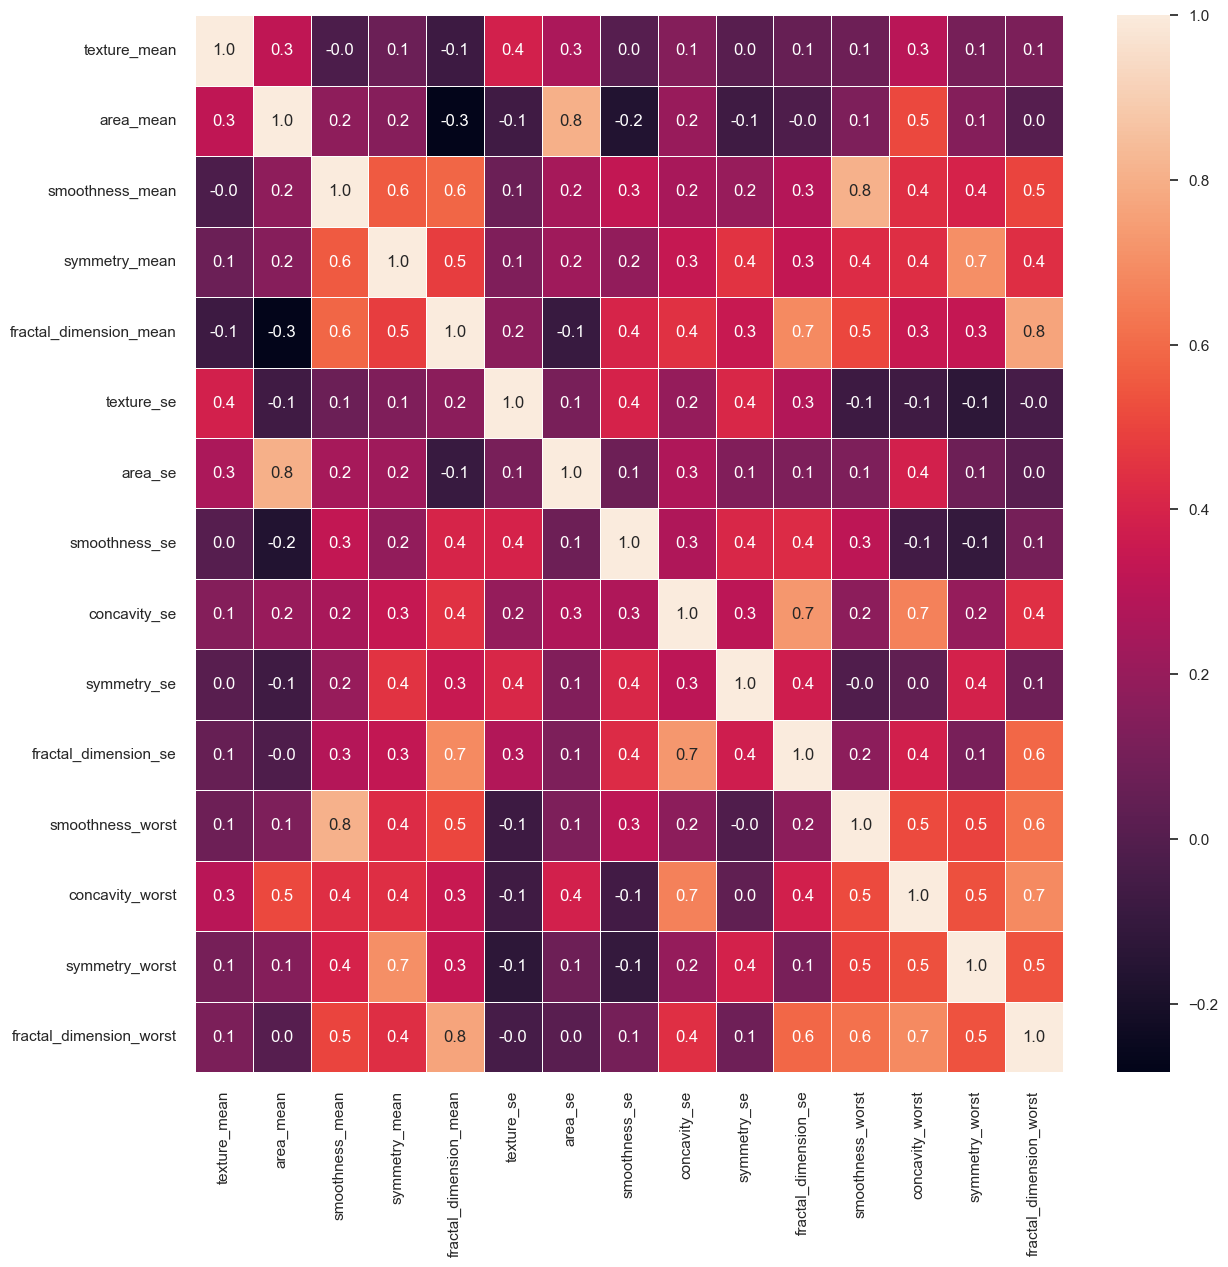

In [310]:
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Now we can observe that there are no very highly correlated independent variables are left, also we can see that although some of the independent variables are negatively correlated with each other, none of these are highly negative, implying values closer to -0.9

## Finding Outliers if present

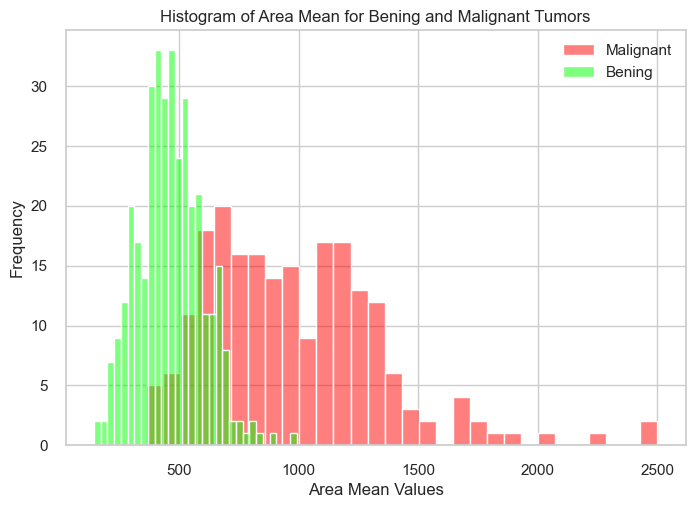

Most frequent malignant area mean is:  646.8533333333334


In [311]:
m = plt.hist(outlierDF[outlierDF["diagnosis"] == "M"].area_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(outlierDF[outlierDF["diagnosis"] == "B"].area_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Area Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Area Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_area_mean = m[0].max()
index_frequent_malignant_area_mean = list(m[0]).index(frequent_malignant_area_mean)
most_frequent_malignant_area_mean = m[1][index_frequent_malignant_area_mean]
print("Most frequent malignant area mean is: ",most_frequent_malignant_area_mean)

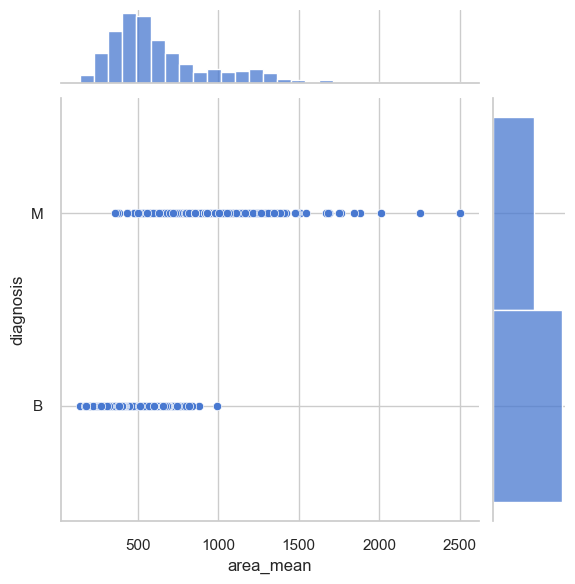

In [312]:
sns.jointplot(x= 'area_mean', y='diagnosis', data=outlierDF)

Here we observe that area mean of malignant tumor is greater than area mean of benign tumors mostly.

The benign distribution follows the gaussian distribution curve.

And there a few outlier values in malignant tumor section, so we shall deal with them.

In [313]:
data_benign = outlierDF[outlierDF["diagnosis"] == "B"]
data_malignant = outlierDF[outlierDF["diagnosis"] == "M"]
desc = data_malignant.area_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_malignant[data_malignant.area_mean < lower_bound].area_mean
print("Outliers: ",data_malignant[(data_malignant.area_mean < lower_bound) | (data_malignant.area_mean > upper_bound)].area_mean.values)
print("Outliers for x_1: ",x_1[(x_1.area_mean < lower_bound) | (x_1.area_mean > upper_bound)].area_mean.values)

Anything outside this range is an outlier: ( -42.375000000000114 , 1951.4250000000002 )
Outliers:  [2250. 2499. 2010. 2501.]
Outliers for x_1:  [2250. 2499. 2010. 2501.]


In [314]:
x_1.area_mean[x_1.area_mean>upper_bound] = upper_bound
print("Outliers: ",x_1[(x_1.area_mean < lower_bound) | (x_1.area_mean > upper_bound)].area_mean.values)

Outliers:  []


## All the possible pairplots

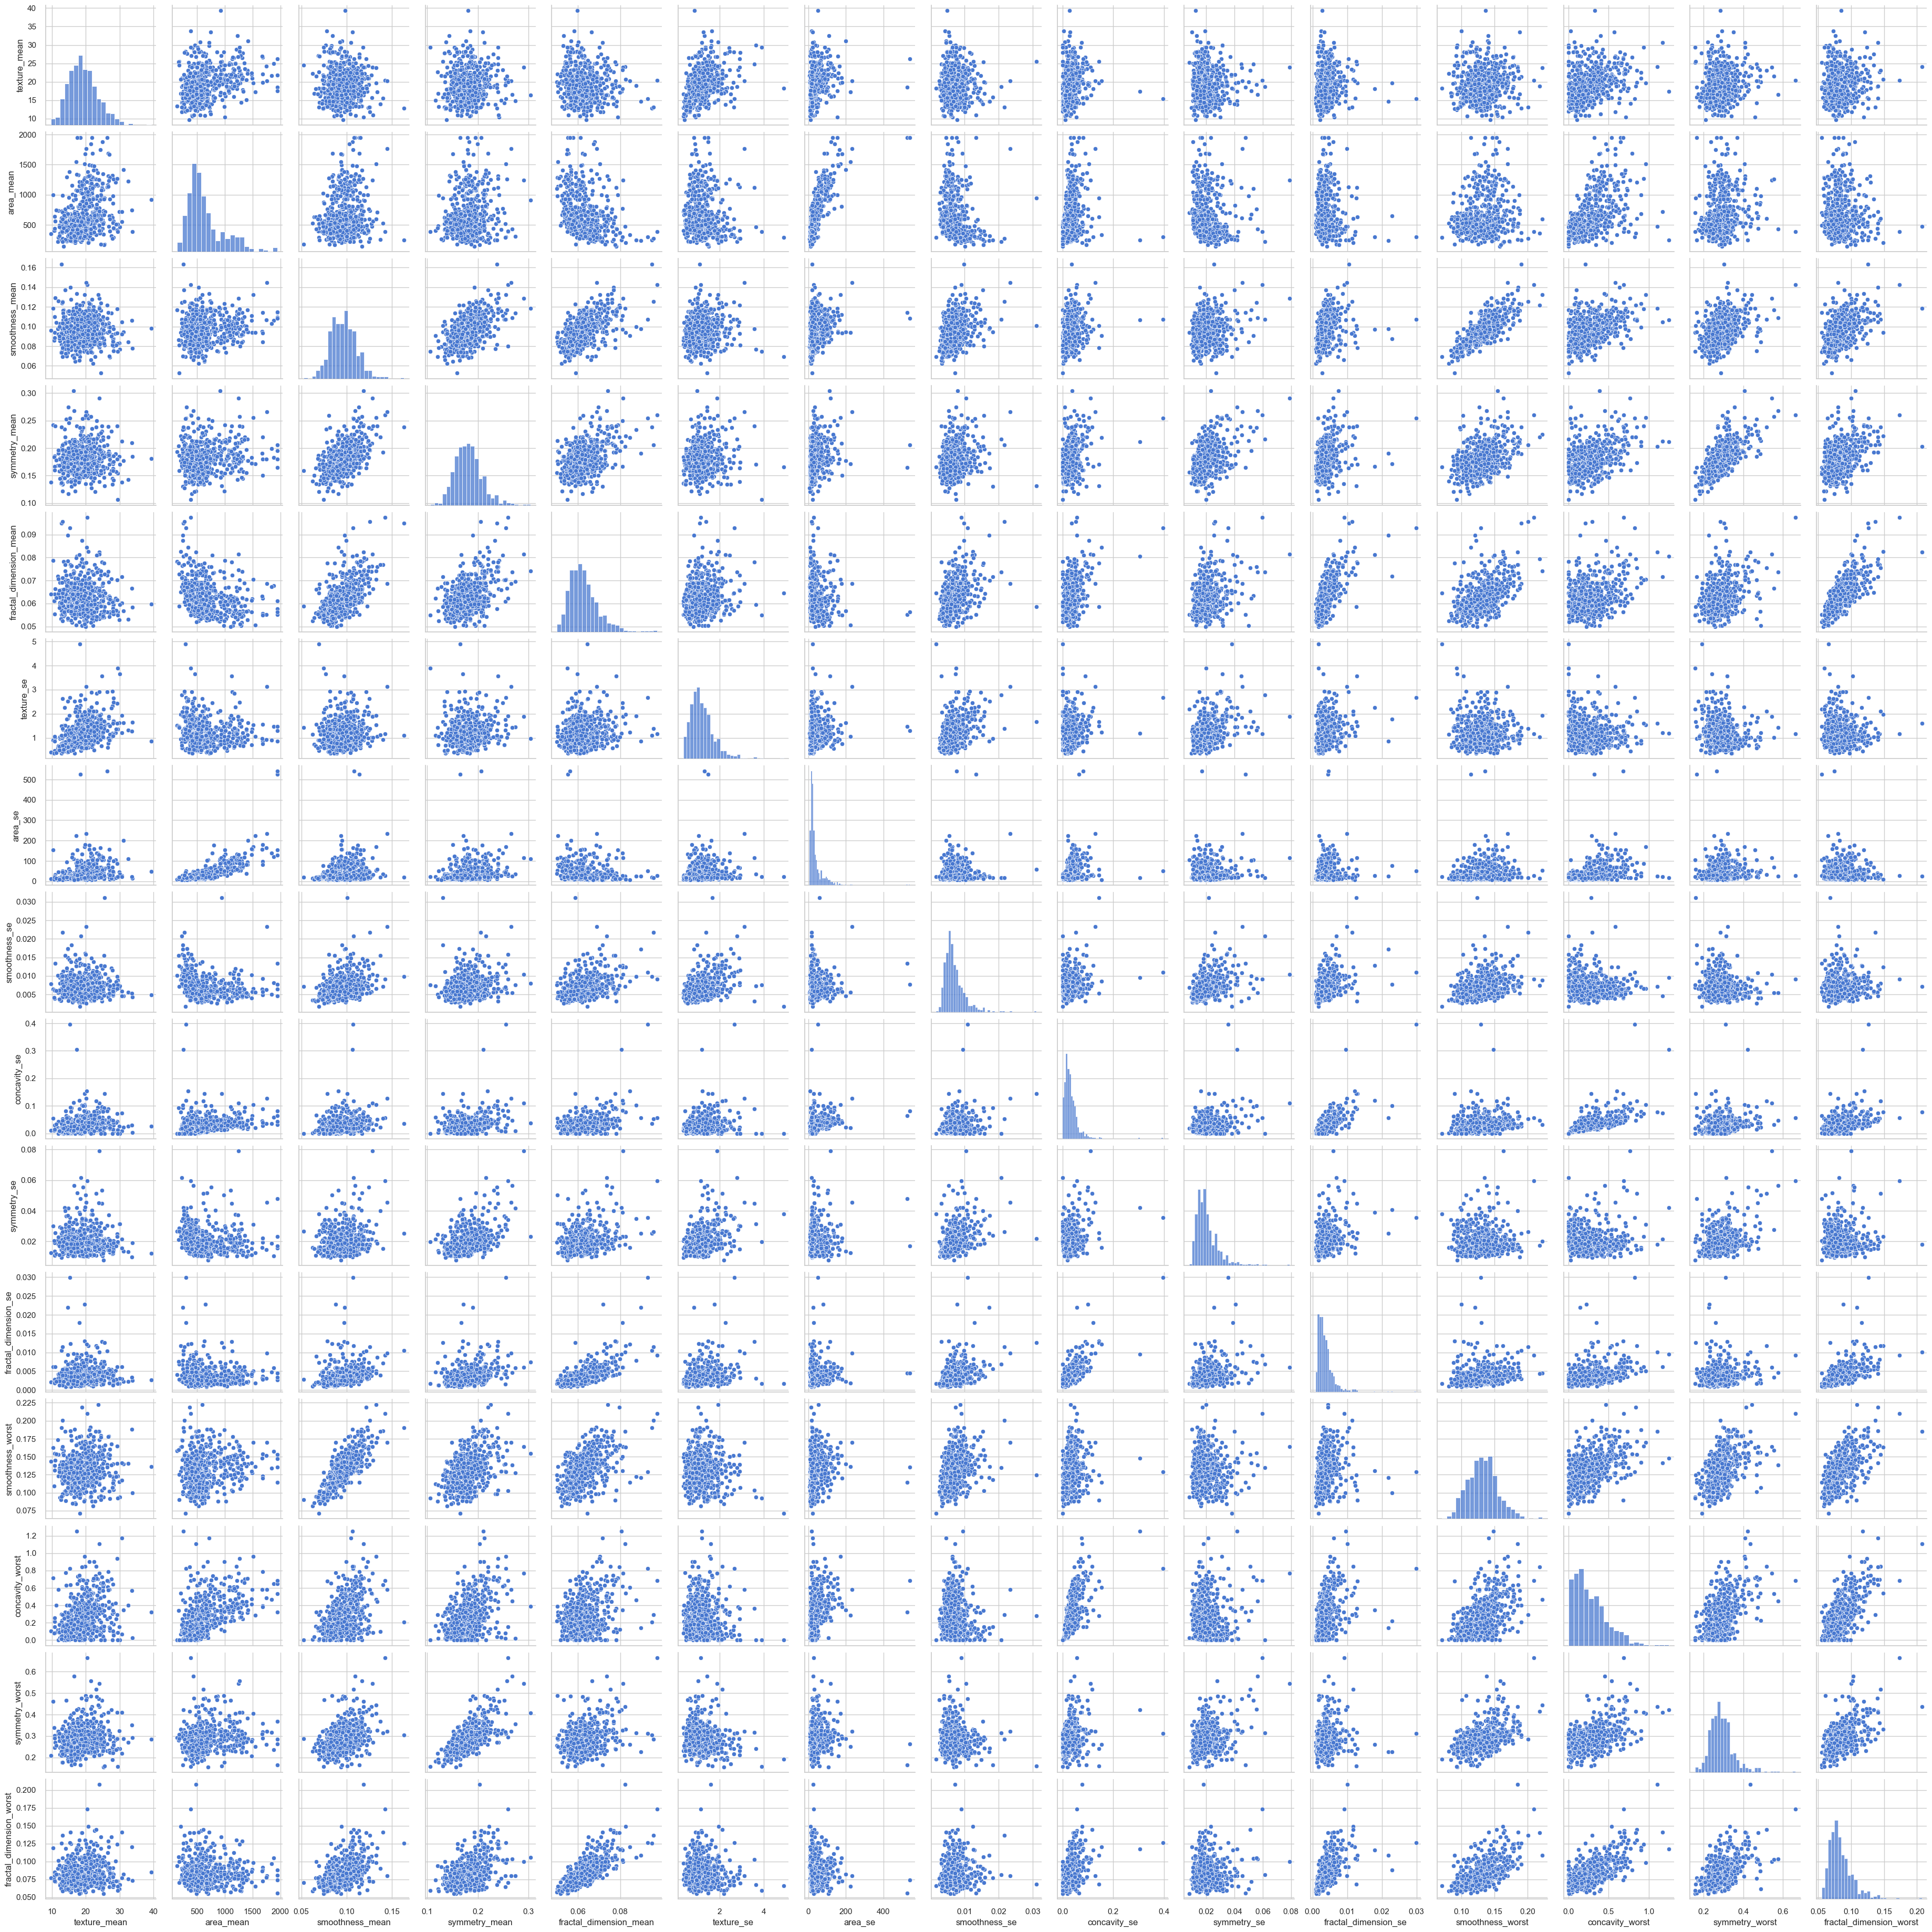

In [315]:
sns.pairplot(data=x_1)

# Preaparing the data for model training

In [316]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()  
x_2 = x_1.copy(deep=True)
columns_to_scale = ['area_mean','area_se','texture_mean','texture_se']
x_2[columns_to_scale] = StandardScaler.fit_transform(x_2[columns_to_scale])

# declaring list for scoring best score of each model
scores=[]

In [317]:
x_2.head()

texture_mean  area_mean  smoothness_mean  symmetry_mean  \
0     -2.073335   1.024732          0.11840         0.2419   
1     -0.353632   1.979907          0.08474         0.1812   
2      0.456187   1.618410          0.10960         0.2069   
3      0.253732  -0.782459          0.14250         0.2597   
4     -1.151816   1.894676          0.10030         0.1809   

   fractal_dimension_mean  texture_se   area_se  smoothness_se  concavity_se  \
0                 0.07871   -0.565265  2.487578       0.006399       0.05373   
1                 0.05667   -0.876244  0.742402       0.005225       0.01860   
2                 0.05999   -0.780083  1.181336       0.006150       0.03832   
3                 0.09744   -0.110409 -0.288378       0.009110       0.05661   
4                 0.05883   -0.790244  1.190357       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

In [318]:
x_1.head()

texture_mean  area_mean  smoothness_mean  symmetry_mean  \
0         10.38     1001.0          0.11840         0.2419   
1         17.77     1326.0          0.08474         0.1812   
2         21.25     1203.0          0.10960         0.2069   
3         20.38      386.1          0.14250         0.2597   
4         14.34     1297.0          0.10030         0.1809   

   fractal_dimension_mean  texture_se  area_se  smoothness_se  concavity_se  \
0                 0.07871      0.9053   153.40       0.006399       0.05373   
1                 0.05667      0.7339    74.08       0.005225       0.01860   
2                 0.05999      0.7869    94.03       0.006150       0.03832   
3                 0.09744      1.1560    27.23       0.009110       0.05661   
4                 0.05883      0.7813    94.44       0.011490       0.05688   

   symmetry_se  fractal_dimension_se  smoothness_worst  concavity_worst  \
0      0.03003              0.006193            0.1622           0.7119   
1      0.01389              0.003532            0.1238           0.2416   
2      0.02250              0.004571            0.1444           0.4504   
3      0.05963              0.009208            0.2098           0.6869   
4      0.01756              0.005115            0.1374           0.4000   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678

## 1 Implementing Random Forest Classifier

Accuracy is:  0.9766081871345029


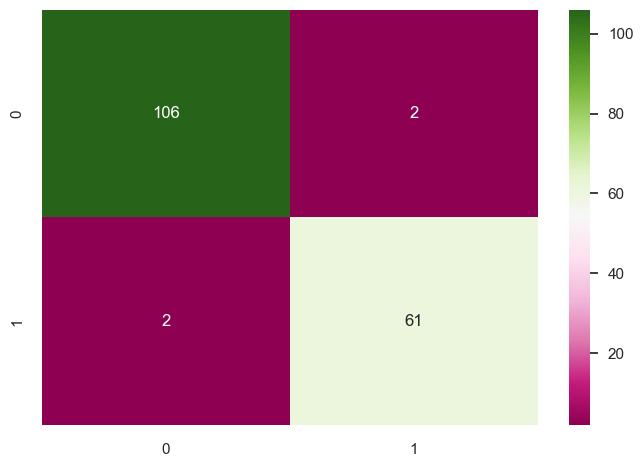

In [319]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=44)      
clr_rf = clf_rf.fit(x_train,y_train)
prediction0=clf_rf.predict(x_test)
ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d",cmap='PiYG')
scores.append(ac)

In [320]:
print(classification_report(y_test, prediction0))

              precision    recall  f1-score   support

           B       0.98      0.98      0.98       108
           M       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



## Univariate Feature Selection using SelectKBest 

SelectKBest removes all but the k highest scoring features

In [321]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 6 features
select_feature = SelectKBest(chi2, k=6).fit(x_train, y_train)

In [322]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [6.06916433e+01 3.54945111e+04 1.00015175e-01 1.95982847e-01
 3.42575072e-04 4.07131026e-02 6.12741067e+03 1.32470372e-03
 6.92896719e-01 1.39557806e-03 2.65927071e-03 2.63226314e-01
 2.58858117e+01 1.00635138e+00 1.23087347e-01]
Feature list: Index(['texture_mean', 'area_mean', 'smoothness_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'texture_se', 'area_se', 'smoothness_se',
       'concavity_se', 'symmetry_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


## 2 Implementing Random Forest Classifier using SelectKBest

Accuracy is:  0.9532163742690059


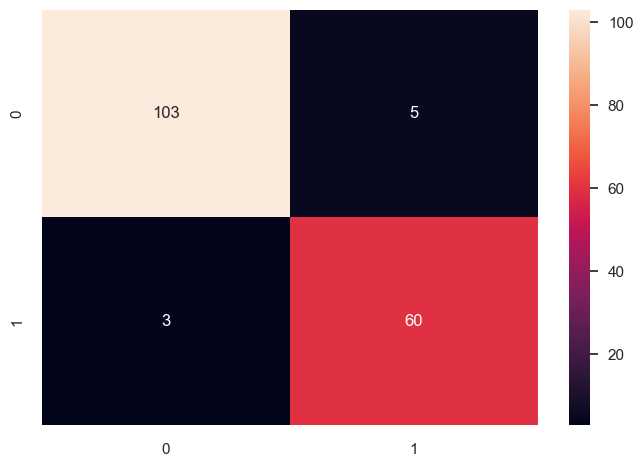

In [323]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)

ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
prediction00=clf_rf_2.predict(x_test_2)
sns.heatmap(cm_2,annot=True,fmt="d")

scores.append(ac_2)

In [324]:
print(classification_report(y_test, prediction00))

              precision    recall  f1-score   support

           B       0.97      0.95      0.96       108
           M       0.92      0.95      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



## Observation

Using top 6 best features we see a very slight decrease in accuracy.

## 3 Implementing logistic regression

In [325]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=5000)

model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)

In [326]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,prediction1)
cm

array([[103,   5],
       [  4,  59]], dtype=int64)

0.9473684210526315

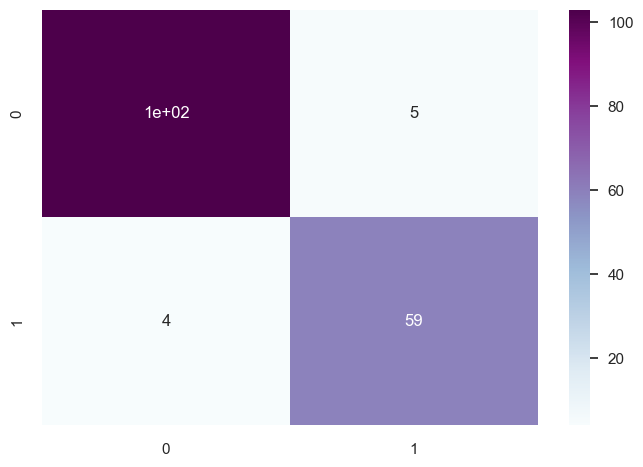

In [327]:
sns.heatmap(cm, annot=True,cmap='BuPu')
scores.append(accuracy_score(y_test,prediction1))
accuracy_score(y_test,prediction1)

In [328]:
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           B       0.96      0.95      0.96       108
           M       0.92      0.94      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



## Observation

Again we see a slight dip in accuracy compared to RFC

## 4 Implementing Decision Tree Method

In [329]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=1, min_samples_split=2)
model2=dtc.fit(x_train,y_train)
prediction2=model2.predict(x_test)
cm2= confusion_matrix(y_test,prediction2)
cm2

array([[100,   8],
       [  2,  61]], dtype=int64)

<AxesSubplot:>

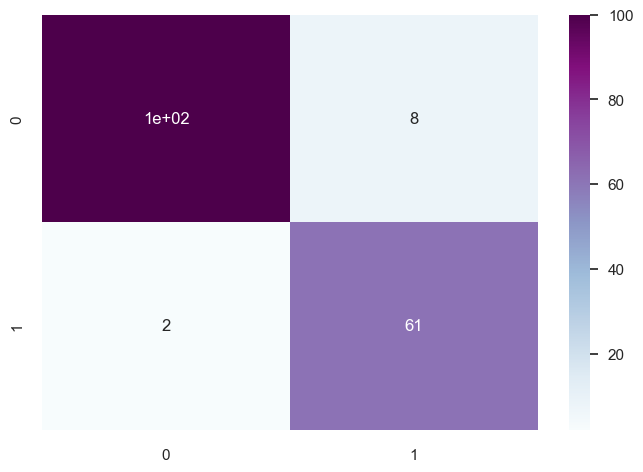

In [330]:
sns.heatmap(cm2, annot=True,cmap='BuPu')

In [331]:
scores.append(accuracy_score(y_test,prediction2))
accuracy_score(y_test,prediction2)

0.9415204678362573

In [332]:
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           B       0.98      0.93      0.95       108
           M       0.88      0.97      0.92        63

    accuracy                           0.94       171
   macro avg       0.93      0.95      0.94       171
weighted avg       0.94      0.94      0.94       171



## Observation
Accuracy of Decision Tree method and logistic regression virtually identical for all practical purpose which again is less than RFC

## 5 Implementing a Support Vector Classifier

In [333]:
from sklearn.svm import SVC

svm=SVC()
model3=svm.fit(x_train,y_train)
prediction3=model3.predict(x_test)
cm3= confusion_matrix(y_test,prediction3)
cm3

array([[108,   0],
       [ 19,  44]], dtype=int64)

<AxesSubplot:>

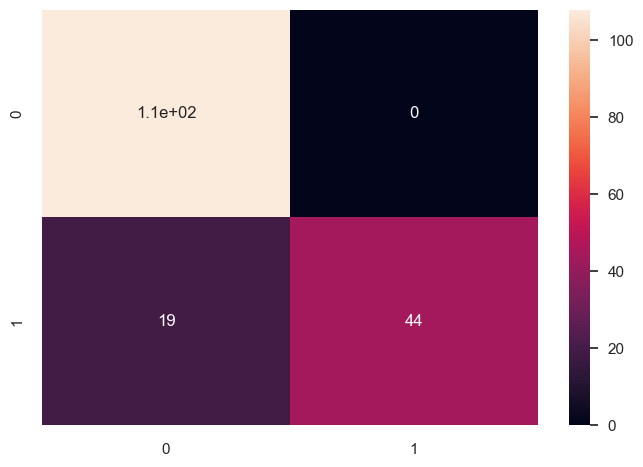

In [334]:
sns.heatmap(cm3, annot=True)

In [335]:
scores.append(accuracy_score(y_test, prediction3))
accuracy_score(y_test, prediction3)

0.8888888888888888

In [336]:
print(classification_report(y_test, prediction3))

              precision    recall  f1-score   support

           B       0.85      1.00      0.92       108
           M       1.00      0.70      0.82        63

    accuracy                           0.89       171
   macro avg       0.93      0.85      0.87       171
weighted avg       0.91      0.89      0.88       171



## Obseravation
There is a significant dip in performance from mid 90s to 88.88 when we compare it to previous methods, also from the previous mehtod. 

There is significant drop in precision while predicting Benign tumors, implying it identified more malignant tumors as benign tumors.

In case of malignant tumor, there was no false classification of benign tumor as malignant tumors, and the recall is significantly low, down to only 70%

## 6 Implementation of Gaussian Naive Bayes Method

In [337]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB(var_smoothing= 2e-9)
model4 = NB.fit(x_train, y_train)
prediction4 = model4.predict(x_test)
cm4=confusion_matrix(y_test, prediction4)
cm4

array([[103,   5],
       [  7,  56]], dtype=int64)

<AxesSubplot:>

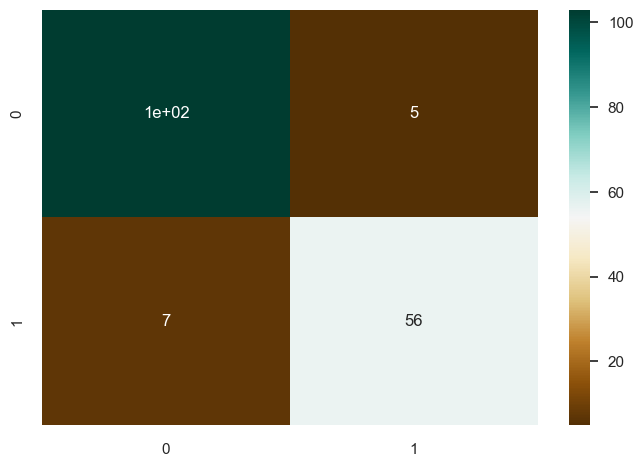

In [338]:
sns.heatmap(cm4, annot=True, cmap='BrBG')

In [339]:
scores.append(accuracy_score(y_test, prediction4))
accuracy_score(y_test, prediction4)

0.9298245614035088

In [340]:
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           B       0.94      0.95      0.94       108
           M       0.92      0.89      0.90        63

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



## Observation
This method seemingly works better than the Support Vector Classifier and is more or less in line with other previous method with at par precision, recall and f1 values

## 7 Implementaion of the K Nearest Neighbour Classifier (KNN)

In [341]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 6, weights = 'uniform',algorithm = 'brute',metric = 'minkowski', n_jobs=4)
model5 = KNN.fit(x_train, y_train)
prediction5 = model5.predict(x_test)
cm5=confusion_matrix(y_test, prediction5)
cm5 

array([[106,   2],
       [ 12,  51]], dtype=int64)

<AxesSubplot:>

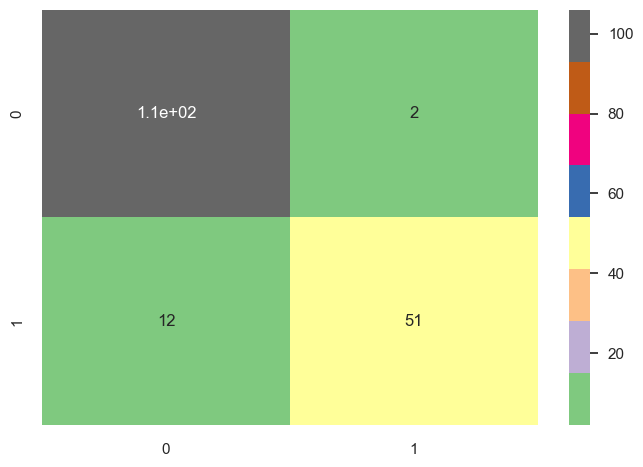

In [342]:
sns.heatmap(cm5, annot=True, cmap = 'Accent')

In [343]:
scores.append(accuracy_score(y_test, prediction5))
accuracy_score(y_test, prediction5)

0.9181286549707602

In [344]:
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           B       0.90      0.98      0.94       108
           M       0.96      0.81      0.88        63

    accuracy                           0.92       171
   macro avg       0.93      0.90      0.91       171
weighted avg       0.92      0.92      0.92       171



## Observation
Similar results as compared to earlier methods, except that the recall for malignant tumors is significantly implying lower true positive predictions.

In [345]:
print('RFC :', accuracy_score(y_test, prediction0))
print('RFC with SelectKBest:', accuracy_score(y_test, prediction00))
print('LR :', accuracy_score(y_test, prediction1))
print('DTC :', accuracy_score(y_test, prediction2))
print('SVC :', accuracy_score(y_test, prediction3))
print('GNB: ', accuracy_score(y_test, prediction4))
print('KNN :', accuracy_score(y_test, prediction5))

RFC : 0.9766081871345029
RFC with SelectKBest: 0.9532163742690059
LR : 0.9473684210526315
DTC : 0.9415204678362573
SVC : 0.8888888888888888
GNB:  0.9298245614035088
KNN : 0.9181286549707602


## Best Accuracy is given by RFC: 97.66

# CROSS VALIDATION

## Implementing Cross Validation of RFC

In [346]:
from sklearn.model_selection import cross_val_score
cv_score0=cross_val_score(clf_rf, x_train, y_train, cv=5)
cv_score0.mean()

0.9572468354430379

## Implementing Cross Validation of RFC with SelectKBest

In [347]:
from sklearn.model_selection import cross_val_score
cv_score00=cross_val_score(clf_rf_2, x_train, y_train, cv=5)
cv_score00.mean()

0.9572151898734177

## Implementing Cross Validation over LR

In [348]:
from sklearn.model_selection import cross_val_score
cv_score1=cross_val_score(model1, x_train, y_train, cv=5)
cv_score1.mean()

0.9219303797468354

## Implementing Cross Validation over DTC

In [349]:
from sklearn.model_selection import cross_val_score
cv_score2=cross_val_score(model2, x_train, y_train, cv=5)
cv_score2.mean()

0.9270886075949367

## Implementing Cross Validation over SVC

In [350]:
from sklearn.model_selection import cross_val_score
cv_score3=cross_val_score(model3, x_train, y_train, cv=5)
cv_score3.mean()

0.8666772151898734

## Implementing Cross Validation over GNB

In [351]:
from sklearn.model_selection import cross_val_score
cv_score4=cross_val_score(model4, x_train, y_train, cv=5)
cv_score4.mean()

0.9321202531645569

## Implementing Cross Validation over KNN

In [352]:
from sklearn.model_selection import cross_val_score
cv_score5=cross_val_score(model5, x_train, y_train, cv=5)
cv_score5.mean()

0.8717088607594936

## Observation
Except for the slight increase in GNB's accuracy, there is decrease in accuracy when Cross Validation is implemented over every other method.

# Hyperparameter Tuning Using GridSearchCV

## RFC Hyperparameter Tuning

In [353]:
ymapped = y.copy(deep=True)#creating copy of Benign and Malignant and mapping them to 0, 1 respectively
ymapped=ymapped.map({'B':0, 'M':1})
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_1, ymapped, test_size=0.3, random_state=42)# mapped for auc curve

In [354]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 13)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2, 4, 6, 8]
# Minimum number of samples required to split a node
min_samples_split = [5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [355]:
param_grid_00 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid_00)

{'n_estimators': [10, 15, 21, 27, 33, 39, 45, 50, 56, 62, 68, 74, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8], 'min_samples_split': [5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}


In [356]:
from sklearn.model_selection import GridSearchCV
E_model_00 = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid_00, cv = 5, verbose=5, n_jobs = -1)
E_model_00


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [10, 15, 21, 27, 33, 39, 45, 50, 56,
                                          62, 68, 74, 80]},
             verbose=5)

In [357]:
E_model_00.fit(x_train, y_train)

Fitting 5 folds for each of 3328 candidates, totalling 16640 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [10, 15, 21, 27, 33, 39, 45, 50, 56,
                                          62, 68, 74, 80]},
             verbose=5)

In [358]:
E_model_00.best_score_

0.9748417721518987

In [359]:
E_model_00.best_params_

{'bootstrap': False,
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 6,
 'min_samples_split': 10,
 'n_estimators': 15}

In [360]:
E_model_00_finalized = RandomForestClassifier(n_estimators=10, bootstrap=False, max_depth=6, max_features='sqrt', min_samples_leaf=2, min_samples_split=5)
clf_rf_0 = E_model_00_finalized.fit(x_train, y_train)
prediction000 = clf_rf_0.predict(x_test)
cm00 = confusion_matrix(y_test,prediction000)
cm00

array([[104,   4],
       [  3,  60]], dtype=int64)

<AxesSubplot:>

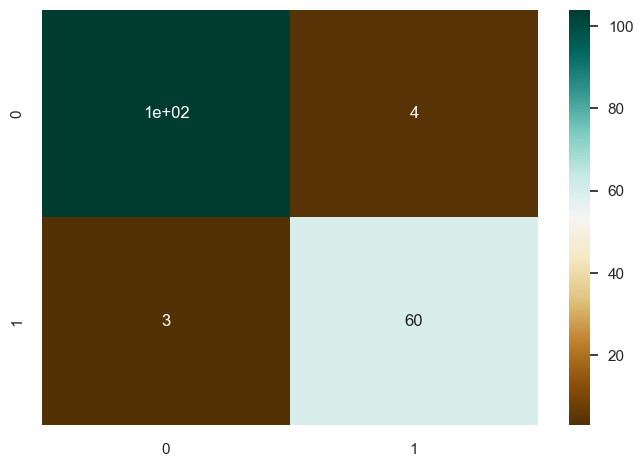

In [361]:
sns.heatmap(cm00, annot=True, cmap='BrBG')

In [362]:
scores.append(accuracy_score(y_test, prediction000))
accuracy_score(y_test, prediction000)

0.9590643274853801

In [363]:
print(classification_report(y_test, prediction000))

              precision    recall  f1-score   support

           B       0.97      0.96      0.97       108
           M       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Observation
Very minor difference at all after prolonged hyperparameter tuning, resulting in slight negligible decrease in performance

## Decision Tree Classifier with Hyperparameter tuning using GridSearchCV

In [364]:
param_grid_2={
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 16,2),
    'min_samples_split': np.arange(6, 20, 2),
    'min_samples_leaf': np.arange(1, 5)
}

In [365]:
E_model_2=GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid_2, cv=5, n_jobs=-1)

In [366]:
E_model_2.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([ 6,  8, 10, 12, 14, 16, 18])})

In [367]:
E_prediction_2=E_model_2.predict(x_test1)
accuracy_score(y_test1, E_prediction_2)

0.9473684210526315

In [368]:
E_model_2.best_score_

0.9396835443037975

In [369]:
E_model_2.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [370]:
E_model_2_finalized = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=10)
model2_0 = E_model_2_finalized.fit(x_train1, y_train1)
prediction200 = model2_0.predict(x_test1)
cm20= confusion_matrix(y_test1,prediction200)
cm20

array([[102,   6],
       [  6,  57]], dtype=int64)

<AxesSubplot:>

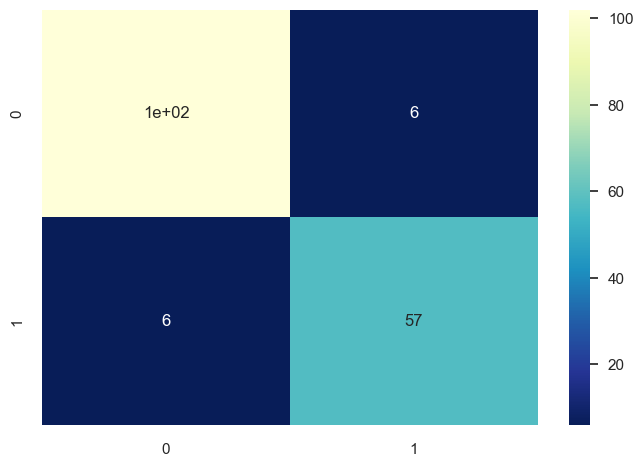

In [371]:
sns.heatmap(cm20, annot=True, cmap='YlGnBu_r')

In [372]:
scores.append(accuracy_score(y_test1, prediction200))
accuracy_score(y_test1, prediction200)

0.9298245614035088

In [373]:
print(classification_report(y_test1, prediction200))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.90      0.90        63

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



## Adaboost Classifier with Hyperparameter tuning using GridSearchCV

In [374]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ADC=AdaBoostClassifier(n_estimators=150, learning_rate=1.5)
E_model_3=ADC.fit(x_train1, y_train1)
E_predicted_3=E_model_3.predict(x_test1)
accuracy_score(y_test1, E_predicted_3)

0.9649122807017544

In [375]:
# Applying GridSearchCV
param_grid_3={
    'n_estimators': np.arange(50,150,10),
    'learning_rate': np.linspace(0.001, 0.25, 6),
    'algorithm': ['SAMME', 'SAMME.R']
}

In [376]:
E_model_3=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid_3, n_jobs=-1, cv=5, scoring='accuracy')

In [377]:
E_model_3.fit(x_train1, y_train1)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': array([0.001 , 0.0508, 0.1006, 0.1504, 0.2002, 0.25  ]),
                         'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140])},
             scoring='accuracy')

In [378]:
E_prediction_3=E_model_3.predict(x_test1)
accuracy_score(y_test1, E_prediction_3)

0.9707602339181286

In [379]:
E_model_3.best_score_

0.969873417721519

In [380]:
E_model_3.best_params_

{'algorithm': 'SAMME',
 'learning_rate': 0.15039999999999998,
 'n_estimators': 140}

In [381]:
E_model_3_finalized = AdaBoostClassifier(algorithm='SAMME', learning_rate=0.1503999999, n_estimators=140)
model3_0 = E_model_3_finalized.fit(x_train1, y_train1)
prediction300 = model3_0.predict(x_test1)
cm30= confusion_matrix(y_test1,prediction300)
cm30

array([[104,   4],
       [  1,  62]], dtype=int64)

<AxesSubplot:>

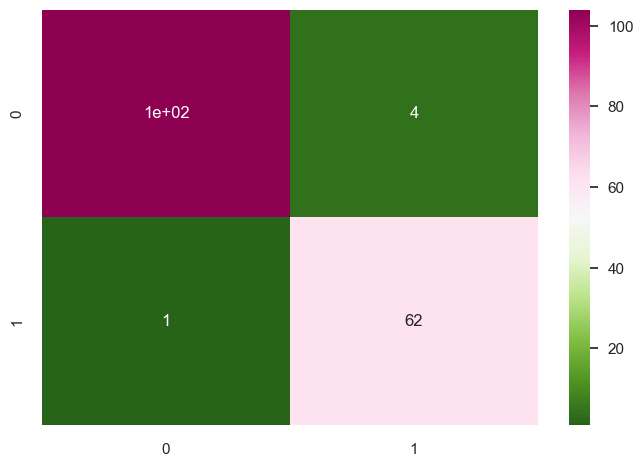

In [382]:
sns.heatmap(cm30, annot=True, cmap='PiYG_r')

In [383]:
scores.append(accuracy_score(y_test1, prediction300))
accuracy_score(y_test1, prediction300)

0.9707602339181286

In [384]:
print(classification_report(y_test1, prediction300))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       108
           1       0.94      0.98      0.96        63

    accuracy                           0.97       171
   macro avg       0.96      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## Observation
It is performing slightly better after HP tuning, accuracy has increased by 1%

## Gradient Boost Classifier with Hyperparameter tuning using GridSearchCV

In [385]:
from sklearn.ensemble import GradientBoostingClassifier

GBC=GradientBoostingClassifier(n_estimators=16, learning_rate=0.1)
GradientBoostingClassifier()
E_model_4=GBC.fit(x_train1, y_train1)
E_predicted_4=E_model_4.predict(x_test1)
accuracy_score(y_test1, E_predicted_4)

0.9473684210526315

In [386]:
#Applying GrirSearchCV
param_grid_4={
    'n_estimators': np.arange(5,150,15),
    'learning_rate': [0.05,0.01,0.08,0.8, 0.1,0.2, 0.4,0.5, 1.0, 1.5],
    'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae']
}

In [387]:
E_model_4=GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=param_grid_4, n_jobs=-1, cv=5, scoring='accuracy')
E_predicted_4=E_model_4.fit(x_train1, y_train1)

In [388]:
E_model_4.best_score_

0.9723101265822784

In [389]:
E_model_4.best_params_

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'n_estimators': 80}

In [390]:
E_model_4_finalized = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=1.0, n_estimators=125)
model4_0 = E_model_4_finalized.fit(x_train1, y_train1)
prediction400 = model4_0.predict(x_test1)
cm40= confusion_matrix(y_test1,prediction400)
cm40

array([[105,   3],
       [  1,  62]], dtype=int64)

<AxesSubplot:>

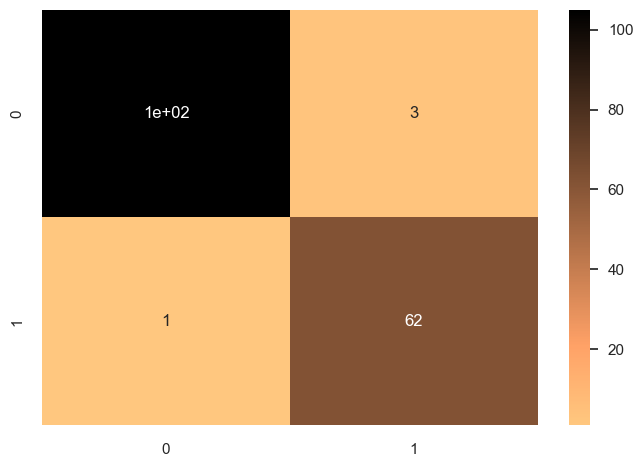

In [391]:
sns.heatmap(cm40, annot=True, cmap='copper_r')

In [392]:
scores.append(accuracy_score(y_test1, prediction400))
accuracy_score(y_test1, prediction400)

0.9766081871345029

In [393]:
print(classification_report(y_test1, prediction400))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       108
           1       0.95      0.98      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Observation
Here we see something astonishing, the accuracy predicted by a hypertuned gradient boost classifier is exactly equal to the accuracy predicted by a random forest classifier to the 16th decimal place

## XgBoost Classifier with Hyperparameter tuning using GridSearchCV

In [394]:
from xgboost import XGBClassifier
XGB=XGBClassifier(n_estimators=90, learning_rate=0.01, max_depth=45)
E_model_5=XGB.fit(x_train1, y_train1)
E_predicted_5=E_model_5.predict(x_test1)
accuracy_score(y_test1, E_predicted_5)

0.9473684210526315

In [395]:
# Applying GridSearchCV
param_grid_5={
    'n_estimators': [10, 50, 75, 100, 175, 150, 200],
    'learning_rate': [0.001, 0.01, 0.1,0.2, 0.4, 0.5, 0.6],
    'max_depth': [1, 2, 3, 4, 5, 6]
}

In [396]:
E_model_5=GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid_5, verbose=1, n_jobs=-1, cv=5)
E_predicted_5=E_model_5.fit(x_train1, y_train1)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits


In [397]:
E_model_5.best_params_


{'learning_rate': 0.4, 'max_depth': 2, 'n_estimators': 100}

In [398]:
E_model_5.best_score_

0.9723101265822784

In [399]:
E_model_5_finalized = XGBClassifier(n_estimators =100, learning_rate = 0.4, max_depth=2)
model5_0 = E_model_5_finalized.fit(x_train1, y_train1)
prediction500 = model5_0.predict(x_test1)
cm50= confusion_matrix(y_test1,prediction500)
cm50

array([[106,   2],
       [  1,  62]], dtype=int64)

<AxesSubplot:>

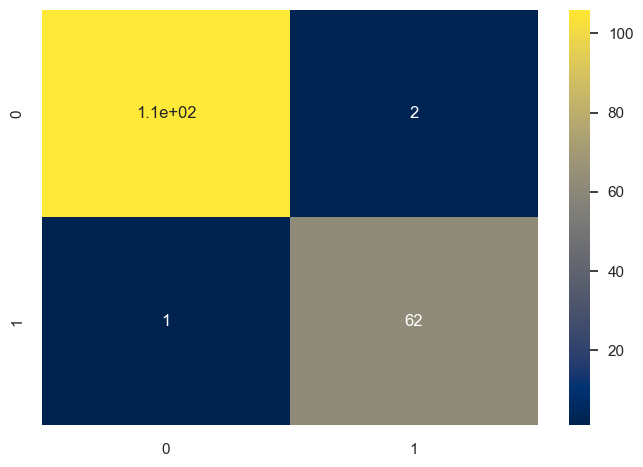

In [400]:
sns.heatmap(cm50, annot=True, cmap='cividis')

In [401]:
scores.append(accuracy_score(y_test1, prediction500))
accuracy_score(y_test1, prediction500)

0.9824561403508771

In [402]:
print(classification_report(y_test1, prediction500))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## Observation
This is the highest accuracy we have seen so far. Also recall and precision for both.

## LGBM Classifier with Hyperparameter tuning using GridSearchCV

In [403]:
from lightgbm import LGBMClassifier
LGB=LGBMClassifier(n_estimators=45, learning_rate=0.065, num_leaves=30, random_state=42, objective='binary')
E_model_6=LGB.fit(x_train1, y_train1)
E_predicted_6=E_model_6.predict(x_test1)
accuracy_score(y_test1, E_predicted_6)

0.9649122807017544

In [404]:
# Applying GridSearchCV
param_grid_6={
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.001, 0.05, 0.1, 0.3],
    'num_leaves': [20, 50, 80, 100],
}

In [405]:
E_model_6=GridSearchCV(estimator=LGBMClassifier(), param_grid=param_grid_6, verbose=1, n_jobs=-1, cv=10)
E_predicted_6=E_model_6.fit(x_train1, y_train1)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


In [406]:
E_model_6.best_params_


{'learning_rate': 0.1, 'n_estimators': 100, 'num_leaves': 20}

In [407]:
E_model_6.best_score_

0.9672435897435898

In [408]:
E_model_6_finalized = LGBMClassifier(n_estimators =100, learning_rate = 0.1, num_leaves=20)
model6_0 = E_model_6_finalized.fit(x_train1, y_train1)
prediction600 = model6_0.predict(x_test1)
cm60= confusion_matrix(y_test1,prediction600)
cm60

array([[105,   3],
       [  2,  61]], dtype=int64)

<AxesSubplot:>

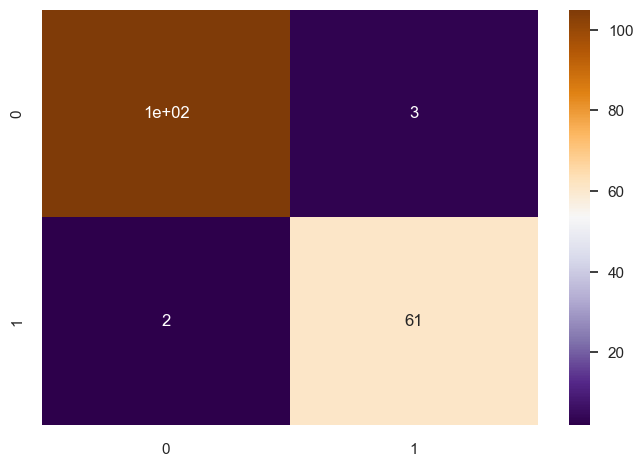

In [409]:
sns.heatmap(cm60, annot=True, cmap='PuOr_r')

In [410]:
scores.append(accuracy_score(y_test1, prediction600))
accuracy_score(y_test1, prediction600)

0.9707602339181286

In [411]:
print(classification_report(y_test1, prediction600))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# AUC for Ensemble Learning Models

## Random Forest Classifier

In [412]:
from sklearn.metrics import roc_curve,roc_auc_score

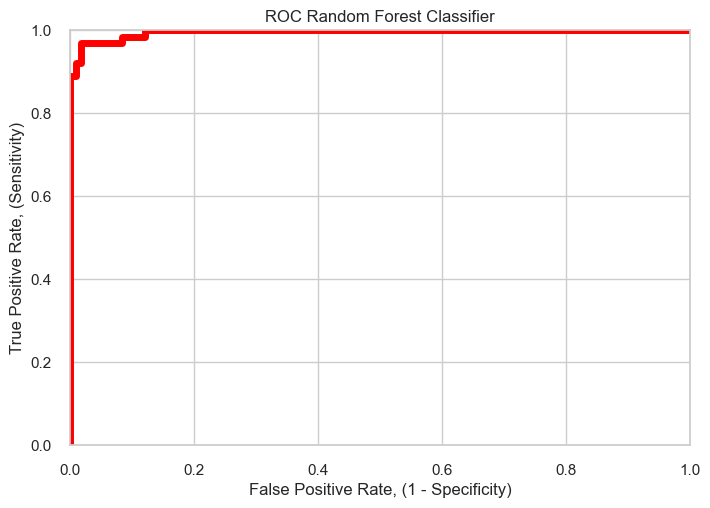

In [413]:
fpr, tpr, thresholds = roc_curve(y_test1, E_model_00.predict_proba(x_test1)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Random Forest Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

## Decision Tree Classifier

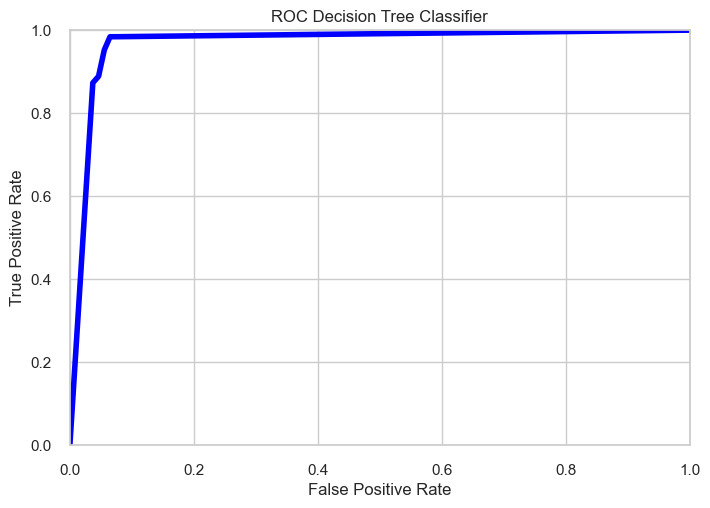

In [414]:
fpr, tpr, thresholds = roc_curve(y_test1, E_model_2.predict_proba(x_test1)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Decision Tree Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(fpr, tpr,color='blue',lw=4)
plt.show()

## AdaBoost Classifier

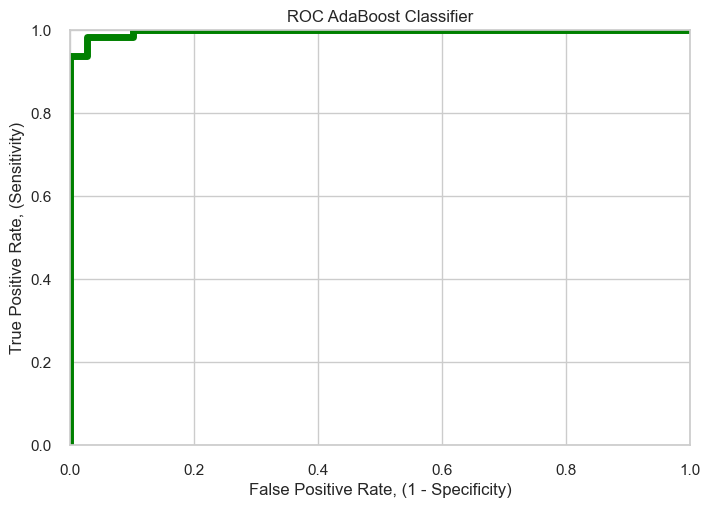

In [415]:
fpr, tpr, thresholds = roc_curve(y_test1, E_model_3.predict_proba(x_test1)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC AdaBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='green',lw=5)
plt.show()

## GradientBoosting Classifier

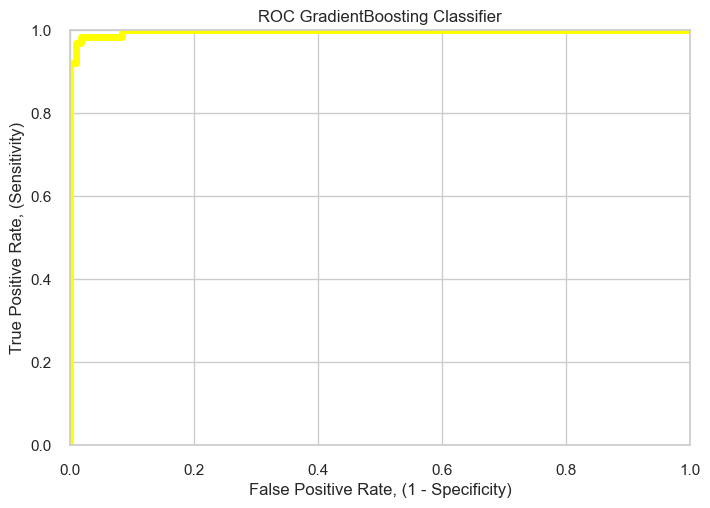

In [416]:
fpr, tpr, thresholds = roc_curve(y_test1, E_model_4.predict_proba(x_test1)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC GradientBoosting Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='yellow',lw=5)
plt.show()

## XgBoost Classifier

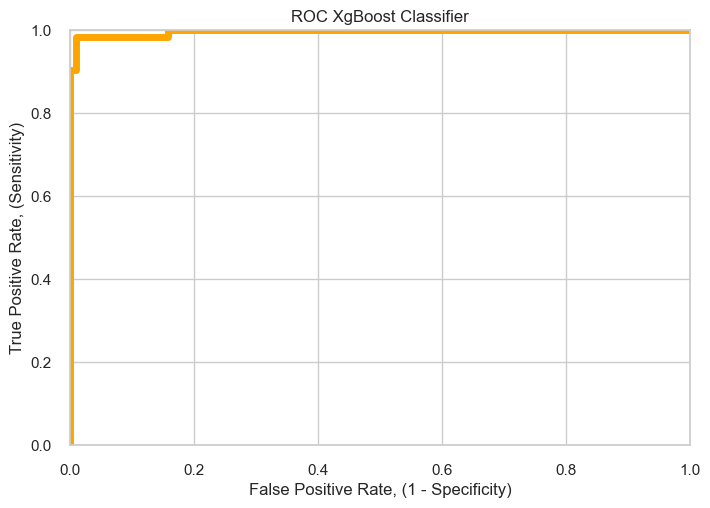

In [417]:
fpr, tpr, thresholds = roc_curve(y_test1, E_model_5.predict_proba(x_test1)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC XgBoost Classifier')
plt.xlabel('False Positive Rate, (1 - Specificity)')
plt.ylabel('True Positive Rate, (Sensitivity)')
plt.plot(fpr, tpr,color='orange',lw=5)
plt.show()

In [418]:
models=["Random Forest Classifier", "Random Forest Classifier with SKBest", "Logistic Regression", "Decision Tree Classifier",
        "Support Vector Classifier", "Gaussian Naive Bayes", "K Nearest Neighbour",
        "Random Forest_CV", "Decision Tree_CV", "Adaboost Classifier_CV",
        "Gradient Boost_CV", "XgBoost_CV", "LGBM Classifier_CV"]
len(models)

13

In [419]:
len(scores)

13

In [421]:
df_stat = pd.DataFrame()
df_stat['models'] = models
df_stat['score'] = scores
df_stat

models     score
0               Random Forest Classifier  0.976608
1   Random Forest Classifier with SKBest  0.953216
2                    Logistic Regression  0.947368
3               Decision Tree Classifier  0.941520
4              Support Vector Classifier  0.888889
5                   Gaussian Naive Bayes  0.929825
6                    K Nearest Neighbour  0.918129
7                       Random Forest_CV  0.959064
8                       Decision Tree_CV  0.929825
9                 Adaboost Classifier_CV  0.970760
10                     Gradient Boost_CV  0.976608
11                            XgBoost_CV  0.982456
12                    LGBM Classifier_CV  0.970760

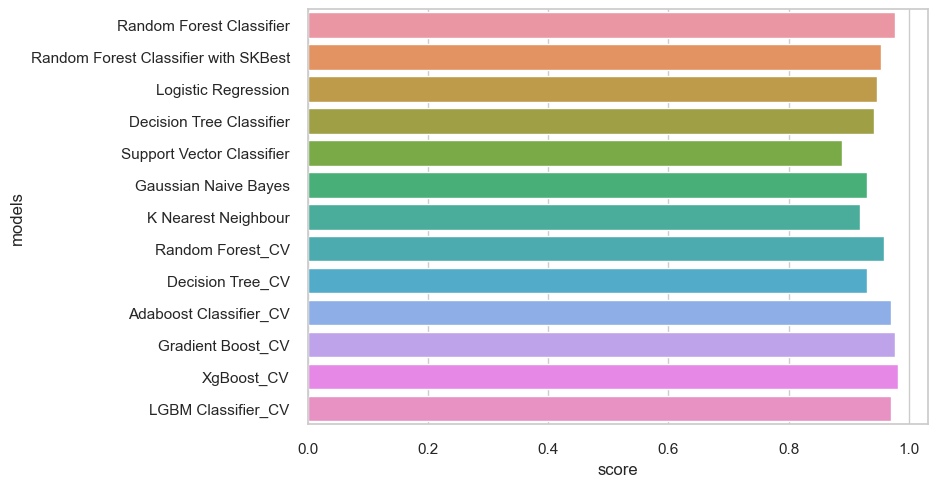

In [422]:
sns.set(style="whitegrid")
ax = sns.barplot(y="models", x="score", data=df_stat)